In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━

random number :  3


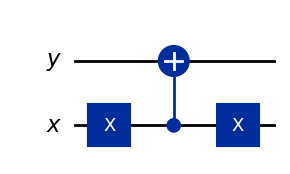

In [43]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import random
# 임의의 f(x) 함수에 대한 도이치 오라클 회로를 구현하여 반환하는 함수
def deutsch_oracle_circuit():
    qy = QuantumRegister(1, 'y')
    qx = QuantumRegister(1, 'x')
    qc = QuantumCircuit(qy, qx) # qc 라는 이름의 2큐비트 양자 회로 객체를 생성

    random.seed()           # 난수 함수를 임의로 초기화
    f = random.randint(4)   # 0,1,2,3 중 임의의 숫자 선택
    print('random number : ', f)
    if f == 0:
      pass                # qy 의 상태 |y XOR f(x)> =|y XOR 0> = |y>
    elif f == 1:
      qc.x(qy)            # qy 의 상태 |y XOR f(x)> =|y XOR 1> = |NOT y>
    elif f == 2:
      qc.cx(qx, qy)       # qy 의 상태 |y XOR f(x)> =|y XOR x> = |y>
    else :
      qc.x(qx)            # qy 의 상태 |y XOR f(x)> =|y XOR ~x> = |y>
      qc.cx(qx, qy)
      qc.x(qx)

    qc.name = 'Deutsch'
    return qc              # qc 객체를 반환
circuit = deutsch_oracle_circuit() # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

random number :  2


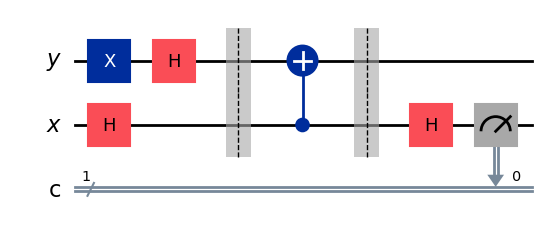

In [34]:
qx = QuantumRegister(1,'x') # 1 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
qy = QuantumRegister(1,'y') # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
c = ClassicalRegister(1,'c') # 1 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시

circuit = QuantumCircuit(qy, qx, c)
circuit.h(qx) # qx에 H gate 적용
circuit.x(qy) # qy에 x gate -> qy 상태가 |1> 이 됨.
circuit.h(qy) # qy에 H gate -> qy 상태가 |-> 이 됨.

circuit.barrier()
circuit.compose(deutsch_oracle_circuit(), [0,1], inplace=True)
circuit.barrier()

circuit.h(qx)
circuit.measure(qx,c)      # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력


In [35]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.c.get_counts()
print (count)


{'1': 1}


In [38]:

if ('0' in count) :
  answer = 'constant'
else :
  answer = 'balanced'

print (f'f(x) is a {answer} function.')

f(x) is a balanced function.
